<a href="https://colab.research.google.com/github/karisobomac/ANN-Regression-model-to-predict-the-electrical-energy-output-of-a-Combined-Cycle-Power-Plan/blob/main/Artificial_Neural_Network_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [86]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [62]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [63]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values




In [64]:
corr_matrix = dataset.corr()

corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,AT,V,AP,RH,PE
AT,1.00,0.84,-0.51,-0.54,-0.95
V,0.84,1.00,-0.41,-0.31,-0.87
AP,-0.51,-0.41,1.00,0.10,0.52
RH,-0.54,-0.31,0.10,1.00,0.39
PE,-0.95,-0.87,0.52,0.39,1.00


In [65]:
dataset.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [66]:
dataset.keys()

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [67]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [69]:
dataset.describe()


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [70]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [71]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Splitting the dataset into the Training set and Test set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [73]:
X_train

array([[  11.22,   43.13, 1017.24,   80.9 ],
       [  13.67,   54.3 , 1015.92,   75.42],
       [  32.84,   77.95, 1014.68,   45.8 ],
       ...,
       [  16.81,   38.52, 1018.26,   75.21],
       [  12.8 ,   41.16, 1022.43,   86.19],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [74]:
X_test

array([[  28.66,   77.95, 1009.56,   69.07],
       [  17.48,   49.39, 1021.51,   84.53],
       [  14.86,   43.14, 1019.21,   99.14],
       ...,
       [  12.24,   44.92, 1023.74,   88.21],
       [  27.28,   47.93, 1003.46,   59.22],
       [  17.28,   39.99, 1007.09,   74.25]])

In [75]:
y_train

array([473.93, 467.87, 431.97, ..., 459.01, 462.72, 428.12])

In [76]:
y_test

array([431.23, 460.01, 461.14, ..., 473.26, 438.  , 463.28])

## Part 2 - Building the ANN

### Initializing the ANN

initialize ANN as a sequence of layers by Tensorflow


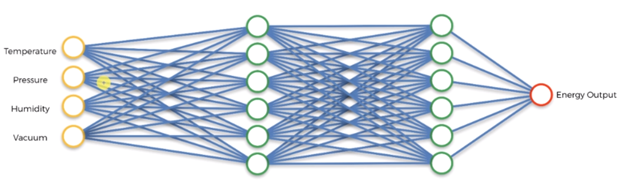

In [77]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [78]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [79]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [80]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [81]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [82]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 1s 969us/step - loss: 283600.7993
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 2285.9280
Epoch 3/100
240/240 [==============================] - 0s 960us/step - loss: 385.6005
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 365.0545
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 359.4024
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 351.9374
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 330.5065
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 316.6542
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 294.7285
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 281.2286
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 260.7962
Epoch 12/100
240/240 [==============================] - 0s 1ms/ste

### Predicting the results of the Test set

In [87]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.78 431.23]
 [462.78 460.01]
 [466.25 461.14]
 ...
 [473.52 473.26]
 [440.27 438.  ]
 [459.49 463.28]]
